# AI Course Homework: Machine Learning Fundamentals

This notebook provides hands-on experience with key machine learning concepts: **Naive Bayes**, **Decision Trees**, **Regression (Polynomial and Logistic)**, **Neural Networks** and **CNN**. You'll implement algorithms from scratch and apply them to datasets to deepen your understanding. The notebook is divided into five sections, each with a theoretical overview and practical exercises.

**Instructions:**
- Complete all sections in the code and answer the questions.
- Submit the notebook with all code cells executed and outputs visible.
- Use `numpy` for basic operations, but implement core algorithm logic yourself where indicated



## Sections
1. **Naive Bayes**
2. **Decision Trees**
3. **Regression (Polynomial and Logistic)**
4. **Neural Networks (Perceptron and Multi-Layer Perceptron)**
5. **CNN From Scratch!**

In [2]:
Name="Matin Bagheri"
Student_Number="402105727"

## Section 1: Naive Bayes

### Theoretical Overview
**Naive Bayes** is a probabilistic classifier that assumes features are conditionally independent given the class label, using Bayes' theorem:

$$ P(Y | F_1, ..., F_n) \propto P(Y) \prod_{i} P(F_i | Y) $$

Here, you'll implement Naive Bayes for spam classification.

### Practical Exercise: Implementing Naive Bayes
**Dataset:** Emails labeled 'spam' or 'ham' with binary features 'free' and 'money'.

| free | money | label |
|------|-------|-------|
| 1    | 0     | spam  |
| 0    | 1     | spam  |
| 0    | 0     | ham   |
| 1    | 1     | spam  |
| 0    | 0     | ham   |

**Tasks:**
1. Calculate prior probabilities $ P(\text{spam}) $ and $ P(\text{ham}) $.
2. Calculate conditional probabilities with Laplace smoothing ($ k=1 $): $ P(\text{free}=1 | \text{spam}) $, $ P(\text{free}=1 | \text{ham}) $, $ P(\text{money}=1 | \text{spam}) $, $ P(\text{money}=1 | \text{ham}) $.
3. Predict the label for a new email: $ \text{free}=1 $, $ \text{money}=0 $.

**Questions:**
- Why is Laplace smoothing important?
  - **Answer:** Our sample space has a limited number of samples, and might not include some features and example of data, but it doesn't mean they're impossible to happen, just because they have not happened in our sample space. So laplace smoothing changes their probability of happening from zero to a small amount, by assuming we have seen every imaginable sample in our sample space k times (k=1 in this case)
- How does feature independence affect performance?
  - **Answer:** By assuming features only depend on the label, we ignore dependencies among features (which do exist, but are not so significant) and by doing that, make calculations on CVTs much simpler and drastically improve performance (and slightly decrease precision)

In [3]:
import numpy as np

# Toy dataset
data = np.array([
    [1, 0, 'spam'],
    [0, 1, 'spam'],
    [0, 0, 'ham'],
    [1, 1, 'spam'],
    [0, 0, 'ham']
])
X = data[:, :-1].astype(int)
y = data[:, -1]

# Calculate prior probabilities
total = len(y)
p_spam = np.sum(y == 'spam') / total
p_ham = np.sum(y == 'ham') / total
print(f'P(spam) = {p_spam}, P(ham) = {p_ham}')

# Calculate conditional probabilities with Laplace smoothing
def conditional_prob(feature_idx, value, label, X, y, k=1):
    return (np.sum((X[y == label][:, feature_idx] == value)) + k)/ (len(X[y == label]) + k * 2)

p_free1_spam = conditional_prob(0, 1, 'spam', X, y)
p_free1_ham = conditional_prob(0, 1, 'ham', X, y)
p_money1_spam = conditional_prob(1, 1, 'spam', X, y)
p_money1_ham = conditional_prob(1, 1, 'ham', X, y)
print(f'P(free=1|spam) = {p_free1_spam}, P(free=1|ham) = {p_free1_ham}')
print(f'P(money=1|spam) = {p_money1_spam}, P(money=1|ham) = {p_money1_ham}')

# Predict for new email
new_email = np.array([1, 0])

p_spam_unnorm = p_spam * conditional_prob(0, new_email[0], 'spam', X, y) * conditional_prob(1, new_email[1], 'spam', X, y)
p_ham_unnorm = p_ham * conditional_prob(0, new_email[0], 'ham', X, y) * conditional_prob(1, new_email[1], 'ham', X, y)

# Normalize probabilities
p_spam_norm = p_spam_unnorm / (p_spam_unnorm + p_ham_unnorm)
p_ham_norm = 1 - p_spam_norm


prediction = 'spam' if p_spam_norm >= p_ham_norm else 'ham'
print(f'P(spam|free=1, money=0) = {p_spam_norm}, P(ham|free=1, money=0) = {p_ham_norm}')
print(f'Prediction: {prediction}')

P(spam) = 0.6, P(ham) = 0.4
P(free=1|spam) = 0.6, P(free=1|ham) = 0.25
P(money=1|spam) = 0.6, P(money=1|ham) = 0.25
P(spam|free=1, money=0) = 0.6575342465753424, P(ham|free=1, money=0) = 0.34246575342465757
Prediction: spam


## Section 2: Decision Trees

### Theoretical Overview
**Decision Trees** split data based on features to maximize **information gain**:

$$ IG(X_i) = H(Y) - H(Y | X_i) $$
$$ H(Y) = -\sum_c P(Y=c) \log_2 P(Y=c) $$

where $ H $ is entropy. Overfitting is a risk, addressed by pruning.

### Practical Exercise: Implementing a Decision Tree
**Dataset:** Features $ \text{age} $ (young/old), $ \text{income} $ (low/high), $ \text{student} $ (yes/no), and label $ \text{buys\_product} $ (yes/no).

| age   | income | student | buys_product |
|-------|--------|---------|--------------|
| young | high   | no      | no           |
| young | high   | yes     | yes          |
| old   | high   | no      | yes          |
| old   | low    | yes     | yes          |
| young | low    | no      | no           |
| old   | low    | no      | no           |
| young | low    | yes     | yes          |
| old   | high   | yes     | yes          |

**Tasks:**
1. Implement entropy calculation.
2. Implement information gain calculation.
3. Build a tree with a max depth of 3, splitting on the highest information gain.
4. Apply pruning: stop splitting if gain < 0.1.
5. Predict for $ \text{age}=\text{young} $, $ \text{income}=\text{low} $, $ \text{student}=\text{no} $.

**Questions:**
- Why was a feature chosen for the root?
  - **Answer:** The feature we choose for root, is the one that by knowing it, we get the most information about the result (compared to other features). In other words, this feature divides samples into two seperate groups (depending on their result (1 or 0)) fairly well.
- How does pruning prevent overfitting?
  - **Answer:** By pruning, if the IG we get from knowing a feature is relatively small, we just ignore it. And by doing this, we avoid overfitting on training data. 

In [4]:
import numpy as np
from collections import Counter

# Toy dataset
data = np.array([
    ['young', 'high', 'no', 'no'],
    ['young', 'high', 'yes', 'yes'],
    ['old', 'high', 'no', 'yes'],
    ['old', 'low', 'yes', 'yes'],
    ['young', 'low', 'no', 'no'],
    ['old', 'low', 'no', 'no'],
    ['young', 'low', 'yes', 'yes'],
    ['old', 'high', 'yes', 'yes']
])
X = data[:, :-1]
y = data[:, -1]

# Entropy calculation
def entropy(labels):
    counts = np.bincount([1 if label == 'yes' else 0 for label in labels])
    probs = counts / len(labels)
    return -np.sum([p * np.log2(p) for p in probs if p > 0])

H_y = entropy(y)
print(f'Entropy of buys_product: {H_y}')

# Information gain calculation
def info_gain(feature_idx, X, y):
    feature_values = np.unique(X[:, feature_idx])
    y_entropy = entropy(y)
    xy_entropy = 0
    
    for value in feature_values:
        subset_mask = X[:, feature_idx] == value
        subset_y = y[subset_mask]
        xy_entropy += (len(subset_y) / len(y)) * entropy(subset_y)
    
    return y_entropy - xy_entropy

# Decision Tree Node
class TreeNode:
    def __init__(self, feature=None, value=None, left=None, right=None, label=None):
        self.feature = feature
        self.value = value
        self.left = left
        self.right = right
        self.label = label

# Build Decision Tree
def build_tree(X, y, depth=0, max_depth=3, min_gain=0.1):
    # reach leaf
    if depth >= max_depth or len(np.unique(y)) == 1:
        most_common = Counter(y).most_common(1)[0][0]
        return TreeNode(label=most_common)
    
    best_gain = -1
    best_feature = None
    
    for feature_idx in range(X.shape[1]):
        gain = info_gain(feature_idx, X, y)
        if gain > best_gain:
            best_gain = gain
            best_feature = feature_idx
    
    # pruning
    if best_gain < min_gain:
        most_common = Counter(y).most_common(1)[0][0]
        return TreeNode(label=most_common)
    
    best_value = np.unique(X[:, best_feature])[0]
    left_mask = X[:, best_feature] == best_value
    right_mask = ~left_mask
    
    left_subtree = build_tree(X[left_mask], y[left_mask], depth+1, max_depth, min_gain)
    right_subtree = build_tree(X[right_mask], y[right_mask], depth+1, max_depth, min_gain)
    
    return TreeNode(feature=best_feature, value=best_value, 
                   left=left_subtree, right=right_subtree)

# Predict
def predict(tree, x):
    if tree.label is not None: # leaf node
        return tree.label
    
    if x[tree.feature] == tree.value:
        return predict(tree.left, x)
    else:
        return predict(tree.right, x)


# Build and predict
tree = build_tree(X, y)
new_instance = ['young', 'low', 'no']
prediction = predict(tree, new_instance)
print(f'Prediction for young, low, no: {prediction}')

Entropy of buys_product: 0.954434002924965
Prediction for young, low, no: no


## Section 3: Regression (Polynomial and Logistic)

### Theoretical Overview
**Polynomial Regression** fits continuous outcomes:

$$ y(x, \mathbf{w}) = \sum_{j=0}^{M} w_j x^j $$
- **Error:** $ E(\mathbf{w}) = \frac{1}{2} \sum_{n=1}^{N} (y(x_n, \mathbf{w}) - t_n)^2 $
- **Regularization:** Adds $ \frac{\lambda}{2} ||\mathbf{w}||^2 $ to prevent overfitting.

**Logistic Regression** predicts class probabilities:

$$ P(Y=1 | X) = \frac{1}{1 + \exp(-(\mathbf{w}^T X + b))} $$
- **Loss:** Cross-entropy.

### Practical Exercise: Polynomial and Logistic Regression
**Tasks:**
1. Fit polynomial regression (degrees 1, 3, 9) to a synthetic dataset and plot.
2. Apply Ridge regularization to degree 9 ($ \lambda = 0.01 $) and plot.
3. Implement logistic regression with gradient descent on the Decision Tree dataset.
4. Compare polynomial and logistic regression on the classification task.

**Questions:**
- Why does degree 9 overfit?
  - **Answer:** Cause it'll try to fit to all training data points exactly (and it's able to do that, cause it has a degree of 9) and this will cause extreme and weird behaviour in other points.
- How does regularization help?
  - **Answer:** It'll add a factor of the size of the weights of the polynomial to the error, preventing the polynomial regression from acquiring large positive and negative weights to overfit to training data.

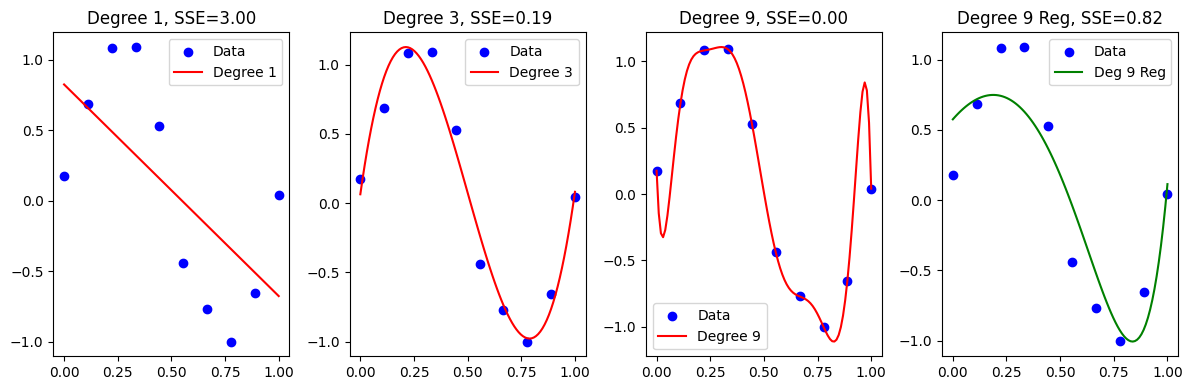

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Polynomial Regression
np.random.seed(0)
X_poly = np.linspace(0, 1, 10).reshape(-1, 1)
y_poly = np.sin(2 * np.pi * X_poly).ravel() + np.random.normal(0, 0.1, 10)

def polynomial_features(X, degree):
    X_poly = np.ones((X.shape[0], 1))
    for d in range(1, degree + 1):
        X_poly = np.hstack((X_poly, X ** d))
    return X_poly

def fit_polynomial(X_poly, y, lambda_reg=0):
    XTX = np.dot(X_poly.T, X_poly)
    I = np.eye(XTX.shape[0])
    I[0, 0] = 0  # bias
    w = np.linalg.inv(XTX + lambda_reg * I) @ X_poly.T @ y
    return w

def predict(X_poly, w):
    return np.dot(X_poly, w)

def sse(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

# Polynomial fits
degrees = [1, 3, 9]
plt.figure(figsize=(12, 4))
X_test = np.linspace(0, 1, 100).reshape(-1, 1)
for i, deg in enumerate(degrees, 1):
    X_poly_train = polynomial_features(X_poly, deg)
    w = fit_polynomial(X_poly_train, y_poly)
    y_pred = predict(X_poly_train, w)
    X_test_poly = polynomial_features(X_test, deg)
    y_test_pred = predict(X_test_poly, w)
    error = sse(y_poly, y_pred)
    plt.subplot(1, 4, i)
    plt.scatter(X_poly, y_poly, color='blue', label='Data')
    plt.plot(X_test, y_test_pred, 'r-', label=f'Degree {deg}')
    plt.title(f'Degree {deg}, SSE={error:.2f}')
    plt.legend()

# Regularized degree 9
X_poly_9 = polynomial_features(X_poly, 9)
w_reg = fit_polynomial(X_poly_9, y_poly, lambda_reg=0.01)
y_pred_reg = predict(X_poly_9, w_reg)
X_test_poly_9 = polynomial_features(X_test, 9)
y_test_pred_reg = predict(X_test_poly_9, w_reg)
error_reg = sse(y_poly, y_pred_reg)
plt.subplot(1, 4, 4)
plt.scatter(X_poly, y_poly, color='blue', label='Data')
plt.plot(X_test, y_test_pred_reg, 'g-', label='Deg 9 Reg')
plt.title(f'Degree 9 Reg, SSE={error_reg:.2f}')
plt.legend()
plt.tight_layout()
plt.savefig('regression_plots.png')
# plt.close()

In [6]:
# Logistic Regression
X_log = np.array([
    [0, 0, 0],  # young, high, no
    [0, 0, 1],  # young, high, yes
    [1, 0, 0],  # old, high, no
    [1, 1, 1],  # old, low, yes
    [0, 1, 0],  # young, low, no
    [1, 1, 0],  # old, low, no
    [0, 1, 1],  # young, low, yes
    [1, 0, 1]   # old, high, yes
])
y_log = np.array([0, 1, 1, 1, 0, 0, 1, 1])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, lr=0.1, epochs=1000):
    X = np.hstack([np.ones((X.shape[0], 1)), X]) # bias
    w = np.zeros(X.shape[1])
    for _ in range(epochs):
        z = np.dot(X, w)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / len(y)
        w -= lr * gradient
    return w

w_log = logistic_regression(X_log, y_log)
new_instance_log = np.array([0, 1, 0])
new_instance_log = np.hstack([1, new_instance_log])
prob = sigmoid(np.dot(new_instance_log, w_log))
prediction_log = 1 if prob > 0.5 else 0
print(f'Logistic Regression prediction for young, low, no: {prediction_log} <--- {prob}')

Logistic Regression prediction for young, low, no: 0 <--- 0.03542981711352107


Comparison Results:
- Logistic Regression is designed for classification and outputs probabilities
- Polynomial Regression can be adapted but doesn't output proper probabilities
- For the young/low/no case:
  Logistic Regression predicts: 0 (prob: 0.0354)
  Polynomial Regression would require thresholding continuous outputs


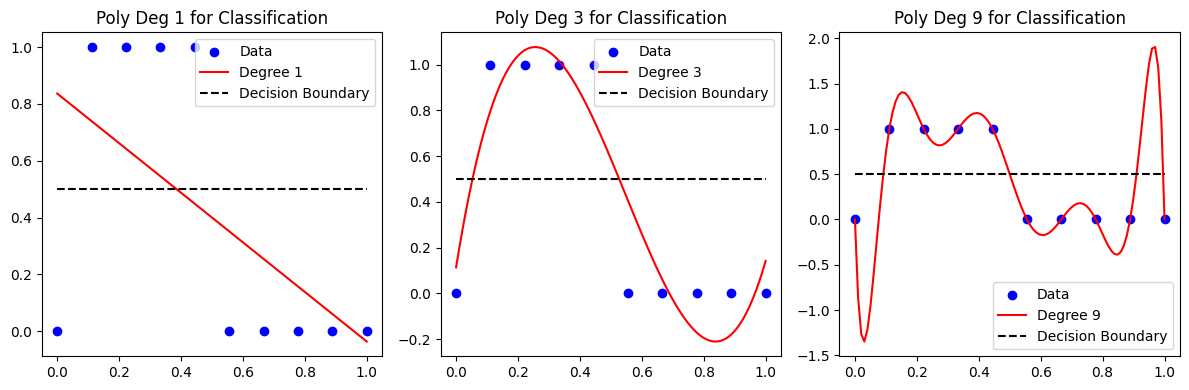

In [7]:
# Comparison on Classification
y_poly_class = np.where(y_poly > 0.5, 1, 0)

# Polynomial regression for classification
plt.figure(figsize=(12, 4))
for i, deg in enumerate([1, 3, 9], 1):
    X_poly_train = polynomial_features(X_poly, deg)
    w = fit_polynomial(X_poly_train, y_poly_class)
    X_test_poly = polynomial_features(X_test, deg)
    y_test_pred = predict(X_test_poly, w)
    
    plt.subplot(1, 3, i)
    plt.scatter(X_poly, y_poly_class, color='blue', label='Data')
    plt.plot(X_test, y_test_pred, 'r-', label=f'Degree {deg}')
    plt.plot(X_test, np.ones_like(X_test)*0.5, 'k--', label='Decision Boundary')
    plt.title(f'Poly Deg {deg} for Classification')
    plt.legend()

plt.tight_layout()
plt.savefig('classification_comparison.png')
# plt.close()

print("Comparison Results:")
print("- Logistic Regression is designed for classification and outputs probabilities")
print("- Polynomial Regression can be adapted but doesn't output proper probabilities")
print("- For the young/low/no case:")
print(f"  Logistic Regression predicts: {prediction_log} (prob: {prob:.4f})")
print("  Polynomial Regression would require thresholding continuous outputs")

## Section 4: Neural Networks (Perceptron and Multi-Layer Perceptron)

### Theoretical Overview
**Perceptron:** A linear classifier.
**Multi-Layer Perceptron (MLP):** Adds hidden layers for non-linear problems.

### Practical Exercise: Implementing Perceptron and MLP
**Dataset:**
| $x_1$ | $x_2$ | $y$ |
|----|----|---|
| 0  | 0  | 0 |
| 0  | 1  | 1 |
| 1  | 0  | 1 |
| 1  | 1  | 0 |

**Tasks:**
1. Implement and train a perceptron.
2. Implement and train an MLP with 2 hidden units.
3. Compare their performance.

**Questions:**
- Why can't the perceptron solve XOR?
  - **Answer:** The perceptron is a linear classifier, meaning it can only learn decision boundaries that are straight lines (or hyperplanes in higher dimensions). But for XOR, there is no single straight line that can separate the two classes (0 and 1) in the input space. 
- How does the MLP help?
  - **Answer:** A Multi-Layer Perceptron (MLP) with at least one hidden layer can learn non-linear decision boundaries (such as XOR) by combining multiple linear separations.


In [18]:
import numpy as np

# Dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Perceptron
class Perceptron:
    def __init__(self):
        self.w = np.zeros(3)
    
    def predict(self, x):
        x_aug = np.insert(x, 0, 1)  # [1, x1, x2]
        return 1 if np.dot(self.w, x_aug) > 0 else 0
    
    def train(self, X, y, epochs=10):
        for _ in range(epochs):
            for xi, yi in zip(X, y):
                xi_aug = np.insert(xi, 0, 1)  # [1, x1, x2]
                prediction = self.predict(xi)
                error = yi - prediction
                self.w += error * xi_aug

perceptron = Perceptron()
perceptron.train(X, y)
print('Perceptron predictions:', [perceptron.predict(x) for x in X])

# MLP
class MLP:
    def __init__(self, hidden_size=2, lr=0.5):
        self.lr = lr
        self.W1 = np.random.randn(2, hidden_size) * 0.1
        self.b1 = np.zeros(hidden_size)
        self.W2 = np.random.randn(hidden_size, 1) * 0.1
        self.b2 = np.zeros(1)
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_deriv(self, x):
        s = self.sigmoid(x)
        return s * (1 - s)
    
    def forward(self, X):
        # Hidden layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        # Output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2
    
    def train(self, X, y, epochs=10000):
         for _ in range(epochs):
            output = self.forward(X)
            
            error = output - y.reshape(-1, 1) # Output layer error
            delta2 = error * self.sigmoid_deriv(self.z2)
            
            # Hidden layer error
            delta1 = np.dot(delta2, self.W2.T) * self.sigmoid_deriv(self.z1)
            
            self.W2 -= self.lr * np.dot(self.a1.T, delta2)
            self.b2 -= self.lr * np.sum(delta2, axis=0)
            self.W1 -= self.lr * np.dot(X.T, delta1)
            self.b1 -= self.lr * np.sum(delta1, axis=0)
    
    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)

mlp = MLP()
mlp.train(X, y)
print('MLP predictions:', mlp.predict(X).flatten())

Perceptron predictions: [1, 1, 0, 0]
MLP predictions: [0 1 1 0]


## Section 5: CNN From Scratch!


__CNN__ s are powerfull tools to work with in the scope of _Computer Vision_. You have seen MLPs before and know how to do forward and backward pass on them. In this part, we want to create a convolutional layer (a simple one, of course!) just to understand well that how a Convolutional Layer works, behind the scenes. You can read more about Convolutional Neural Networks in this [Link](https://medium.com/thedeephub/convolutional-neural-networks-a-comprehensive-guide-5cc0b5eae175)



__FORWARD PASS__:

In forward pass, you should apply the convolution operation on the input image. The convolution operation is as follows:

$$
\text{output}[i, j] = \sum_{k=0}^{K-1} \sum_{l=0}^{L-1} \text{input}[i+k, j+l] \times \text{kernel}[k, l]
$$

You can see a sample convolution operation (with a $3 \times 3$ kernel) in the following image:
<div style="text-align:center;">
  <img src="./Images/Conv.gif" /> 
</div>

Please note that, these are samples for you to understand the operation better. For _forward pass_ that you should implement, please notice that you should convolve the kernel along all $C$ channels of the input image. So, the output shape should be $(N, H_{out}, W_{out})$. These values are calculated as follows:

$$
H_{out} = \frac{H_{in} + 2 \times \text{padding}}{\text{stride} - HH} + 1
$$
$$
W_{out} = \frac{W_{in} + 2 \times \text{padding}}{\text{stride} - WW} + 1
$$


where $HH$ and $WW$ are the height and width of the kernel, respectively. __stride__ is the step size of the kernel, and __padding__ is the number of zeros that should be padded to the input image. Please also note that $b$ stands for bias, which is a scalar value that should be added to the output of the convolution operation. (for each kernel)

You can see a more detailed example, below:

<div style="text-align:center;">
  <img src="./Images/conv3.gif" /> 
</div>




__Backward Pass__:

In backward pass, you should calculate gradient of output with respect to the input image and the kernel. These gradients will be used in _optimization_ to update kernel weights. (You saw something similar, in using MLPs with gradient descent algorithm!). So, we need $d_x$, $d_w$ and $d_b$ in the backward pass. These are calculated as follows:

$$
dx_{padded} [n, :, i * stride: i * stride + HH, j * stride: j * stride + WW] += w[f] \times dout[n, f, i, j]
$$

$$
dw_{f} = \sum_{n=0}^{N - 1} \sum_{i=0}^{H_{out} - 1} \sum_{j=0}^{W_{out} - 1} x_{padded}[n, :, i * stride: i * stride + HH, j * stride: j * stride + WW] \times dout[n, f, i, j]  
$$

$$
db_{f} = \sum_{n=0}^{N - 1} \sum_{i=0}^{H_{out} - 1} \sum_{j=0}^{W_{out} - 1} dout[n, f, i, j]
$$

For better understanding of the backward pass, you can see the following image:

<div style="text-align:center;">
  <img src="./Images/backprop_cs231n.png" />
</div>


In [19]:
import numpy as np


class MyConv:
    def __init__(self, stride, padding):
        self.stride = stride
        self.padding = padding

    def forward(self, x, w, b):
        out = None


        N, C, H, W = x.shape
        F, C, HH, WW = w.shape
        pad = self.padding
        stride = self.stride
        H_out = (H + 2 * pad - HH) // stride + 1
        W_out = (W + 2 * pad - WW) // stride + 1

        x_pad = np.pad(x, ((0, 0), (0, 0), (pad, pad), (pad, pad)), mode='constant')
        out = np.zeros((N, F, H_out, W_out))

        for n in range(N):
            for f in range(F):
                for k in range(H_out):
                    for l in range(W_out):
                        out[n, f, k, l] = np.sum(x_pad[n, :, k*stride:k*stride+HH, l*stride:l*stride+WW] * w[f]) + b[f]

        cache = (x, w, b, x_pad)
        self.cache = cache
        return out

    def backward(self, dout):
        dx, dw, db = None, None, None

        x, w, b, x_padded = self.cache

        ####### TO DO : Implement backward pass #######
        ###############################################

        N, C, H, W = x.shape
        F, C, HH, WW = w.shape
        N, F, H_OUT, W_OUT = dout.shape

        dw = np.zeros_like(w)
        dx = np.zeros_like(x)
        db = np.zeros_like(b)

        dx_padded = np.zeros_like(x_padded)

        for n in range(N):
            for f in range(F):
                for i in range(H_OUT):
                    for j in range(W_OUT):
                        dw[f] += x_padded[n, :, i*self.stride:i*self.stride+HH, j*self.stride:j*self.stride+WW] * dout[n, f, i, j]
                        dx_padded[
                            n,
                            :,
                            i * self.stride : i * self.stride + HH,
                            j * self.stride : j * self.stride + WW,
                        ] += w[f] * dout[n, f, i, j]
                        db[f] += dout[n, f, i, j]

        dx = dx_padded if self.padding == 0 else dx_padded[:, :, self.padding:-self.padding, self.padding:-self.padding]
        # db = ...
        
        self.dx = dx
        self.dw = dw
        self.db = db
        return dx, dw, db

In [20]:
##### DO NOT CHANGE ######
def rel_error(x, y):
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [23]:
# A simple test for forward pass (DO NOT CHANGE)

x_shape = (2, 3, 4, 4)
w_shape = (3, 3, 4, 4)
x = np.linspace(-0.1, 0.5, num=np.prod(x_shape)).reshape(x_shape)
w = np.linspace(-0.2, 0.3, num=np.prod(w_shape)).reshape(w_shape)
b = np.linspace(-0.1, 0.2, num=3)

out = MyConv(stride=2, padding=1).forward(x, w, b)
correct_out = np.array([[[[[-0.08759809, -0.10987781],
                           [-0.18387192, -0.2109216 ]],
                          [[ 0.21027089,  0.21661097],
                           [ 0.22847626,  0.23004637]],
                          [[ 0.50813986,  0.54309974],
                           [ 0.64082444,  0.67101435]]],
                         [[[-0.98053589, -1.03143541],
                           [-1.19128892, -1.24695841]],
                          [[ 0.69108355,  0.66880383],
                           [ 0.59480972,  0.56776003]],
                          [[ 2.36270298,  2.36904306],
                           [ 2.38090835,  2.38247847]]]]])

# The outputted difference which is printed, should be around 1e-8
print ('Testing conv_forward_naive')
print ('difference: ', rel_error(out, correct_out))

Testing conv_forward_naive
difference:  2.2121476417505994e-08


In [24]:
def eval_numerical_gradient_array(f, x, df, h=1e-5):
  grad = np.zeros_like(x)
  it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
  while not it.finished:
    ix = it.multi_index
    
    oldval = x[ix]
    x[ix] = oldval + h
    pos = f(x).copy()
    x[ix] = oldval - h
    neg = f(x).copy()
    x[ix] = oldval
    
    grad[ix] = np.sum((pos - neg) * df) / (2 * h)
    it.iternext()
  return grad

In [30]:
# A simple test for backward pass (DO NOT CHANGE)

x = np.random.randn(4, 3, 5, 5)
w = np.random.randn(2, 3, 3, 3)
b = np.random.randn(
    2,
)
dout = np.random.randn(4, 2, 5, 5)
conv = MyConv(stride=1, padding=1)

dx_num = eval_numerical_gradient_array(
    lambda x: conv.forward(x, w, b), x, dout
)
dw_num = eval_numerical_gradient_array(
    lambda w: conv.forward(x, w, b), w, dout
)
db_num = eval_numerical_gradient_array(
    lambda b: conv.forward(x, w, b), b, dout
)

out = conv.forward(x, w, b)
dx, dw, db = conv.backward(dout)

# Your printed errors should be around 1e-9
print("Testing conv_backward_naive function")
print("dx error: ", rel_error(dx, dx_num))
print("dw error: ", rel_error(dw, dw_num))
print("db error: ", rel_error(db, db_num))

Testing conv_backward_naive function
dx error:  1.0076304417285443e-09
dw error:  3.9942648247177855e-09
db error:  7.726837175210127e-11


In this part, we try to visualize the results of the convolution operation. We will 2 sample photos (in `Images/Sample`) and then we will use our `MyConv` class to apply some cool convolutions (and see their result on an image).

In [32]:
from PIL import Image

first_img, second_img = Image.open("./Images/Sample/image_1.JPG"), Image.open(
    "./Images/Sample/image_2.jpg"
)
first_img = first_img.resize((256, 256))
second_img = second_img.resize((256, 256))

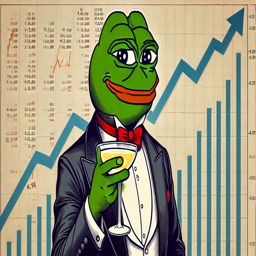

In [33]:
first_img

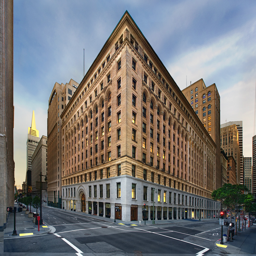

In [34]:
second_img

Convolutions have some interesting usages in image processing. For example, you can extract edges from an image by applying a convolution with a kernel that detects edges. Or you can convolve a specific kernel with your image to make it grayscale or blurred! Look at the definitions below:

__Edge Detection Kernel__:

_Sobel_ is one of the most famous edge detection kernels. It has two kernels, one for detecting vertical edges and the other for horizontal edges. You can see the kernels below:
$$
\text{Sobel}_x = \begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}
$$

$$
\text{Sobel}_y = \begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{bmatrix}
$$


__Grayscale Kernel__:

You can simply convolve the image with the following kernel to make it grayscale:

$$
\text{Grayscale\_across\_R} = \begin{bmatrix}
0 & 0 & 0 \\
0 & 0.3 & 0 \\
0 & 0 & 0
\end{bmatrix}
$$

$$
\text{Grayscale\_across\_G} = \begin{bmatrix}
0 & 0 & 0 \\
0 & 0.6 & 0 \\
0 & 0 & 0
\end{bmatrix}
$$

$$
\text{Grayscale\_across\_B} = \begin{bmatrix}
0 & 0 & 0 \\
0 & 0.1 & 0 \\
0 & 0 & 0
\end{bmatrix}
$$

(Convolve each kernel with its corresponding channel)

__Blurring Kernel__:

One of the famous kernels to blur an image is _Gaussian Blur_. You can see the kernel below:

$$
\text{Gaussian\_Blur} = \frac{1}{16} \times \begin{bmatrix}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1
\end{bmatrix}
$$


In [37]:
img_size = 256

x = np.zeros((2, 3, img_size, img_size))
x[0] = np.array(first_img).transpose(2, 0, 1)
x[1] = np.array(second_img).transpose(2, 0, 1)

# a convolution weight, holding 4 filters 3x3
w = np.zeros((4, 3, 3, 3))  # 4 filters, 3 channels, 3x3

# Grayscale conversion
w[0, 0, 1, 1] = 0.3  # R
w[0, 1, 1, 1] = 0.6   # G
w[0, 2, 1, 1] = 0.1   # B

# Gaussian blur
gaussian_kernel = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
]) / 16
w[1, :, :, :] = np.stack([gaussian_kernel]*3, axis=0)

w[2, :, :, :] = np.array([  # Sobel_x (vertical edges)
    [[-1, 0, 1],
     [-2, 0, 2],
     [-1, 0, 1]],
    [[-1, 0, 1],
     [-2, 0, 2],
     [-1, 0, 1]],
    [[-1, 0, 1],
     [-2, 0, 2],
     [-1, 0, 1]]
])

w[3, :, :, :] = np.array([  # Sobel_y (horizontal edges)
    [[-1, -2, -1],
     [0, 0, 0],
     [1, 2, 1]],
    [[-1, -2, -1],
     [0, 0, 0],
     [1, 2, 1]],
    [[-1, -2, -1],
     [0, 0, 0],
     [1, 2, 1]]
])

b = np.array([0, 128, 128, 0])

conv = MyConv(stride=1, padding=1)
out = conv.forward(x, w, b)

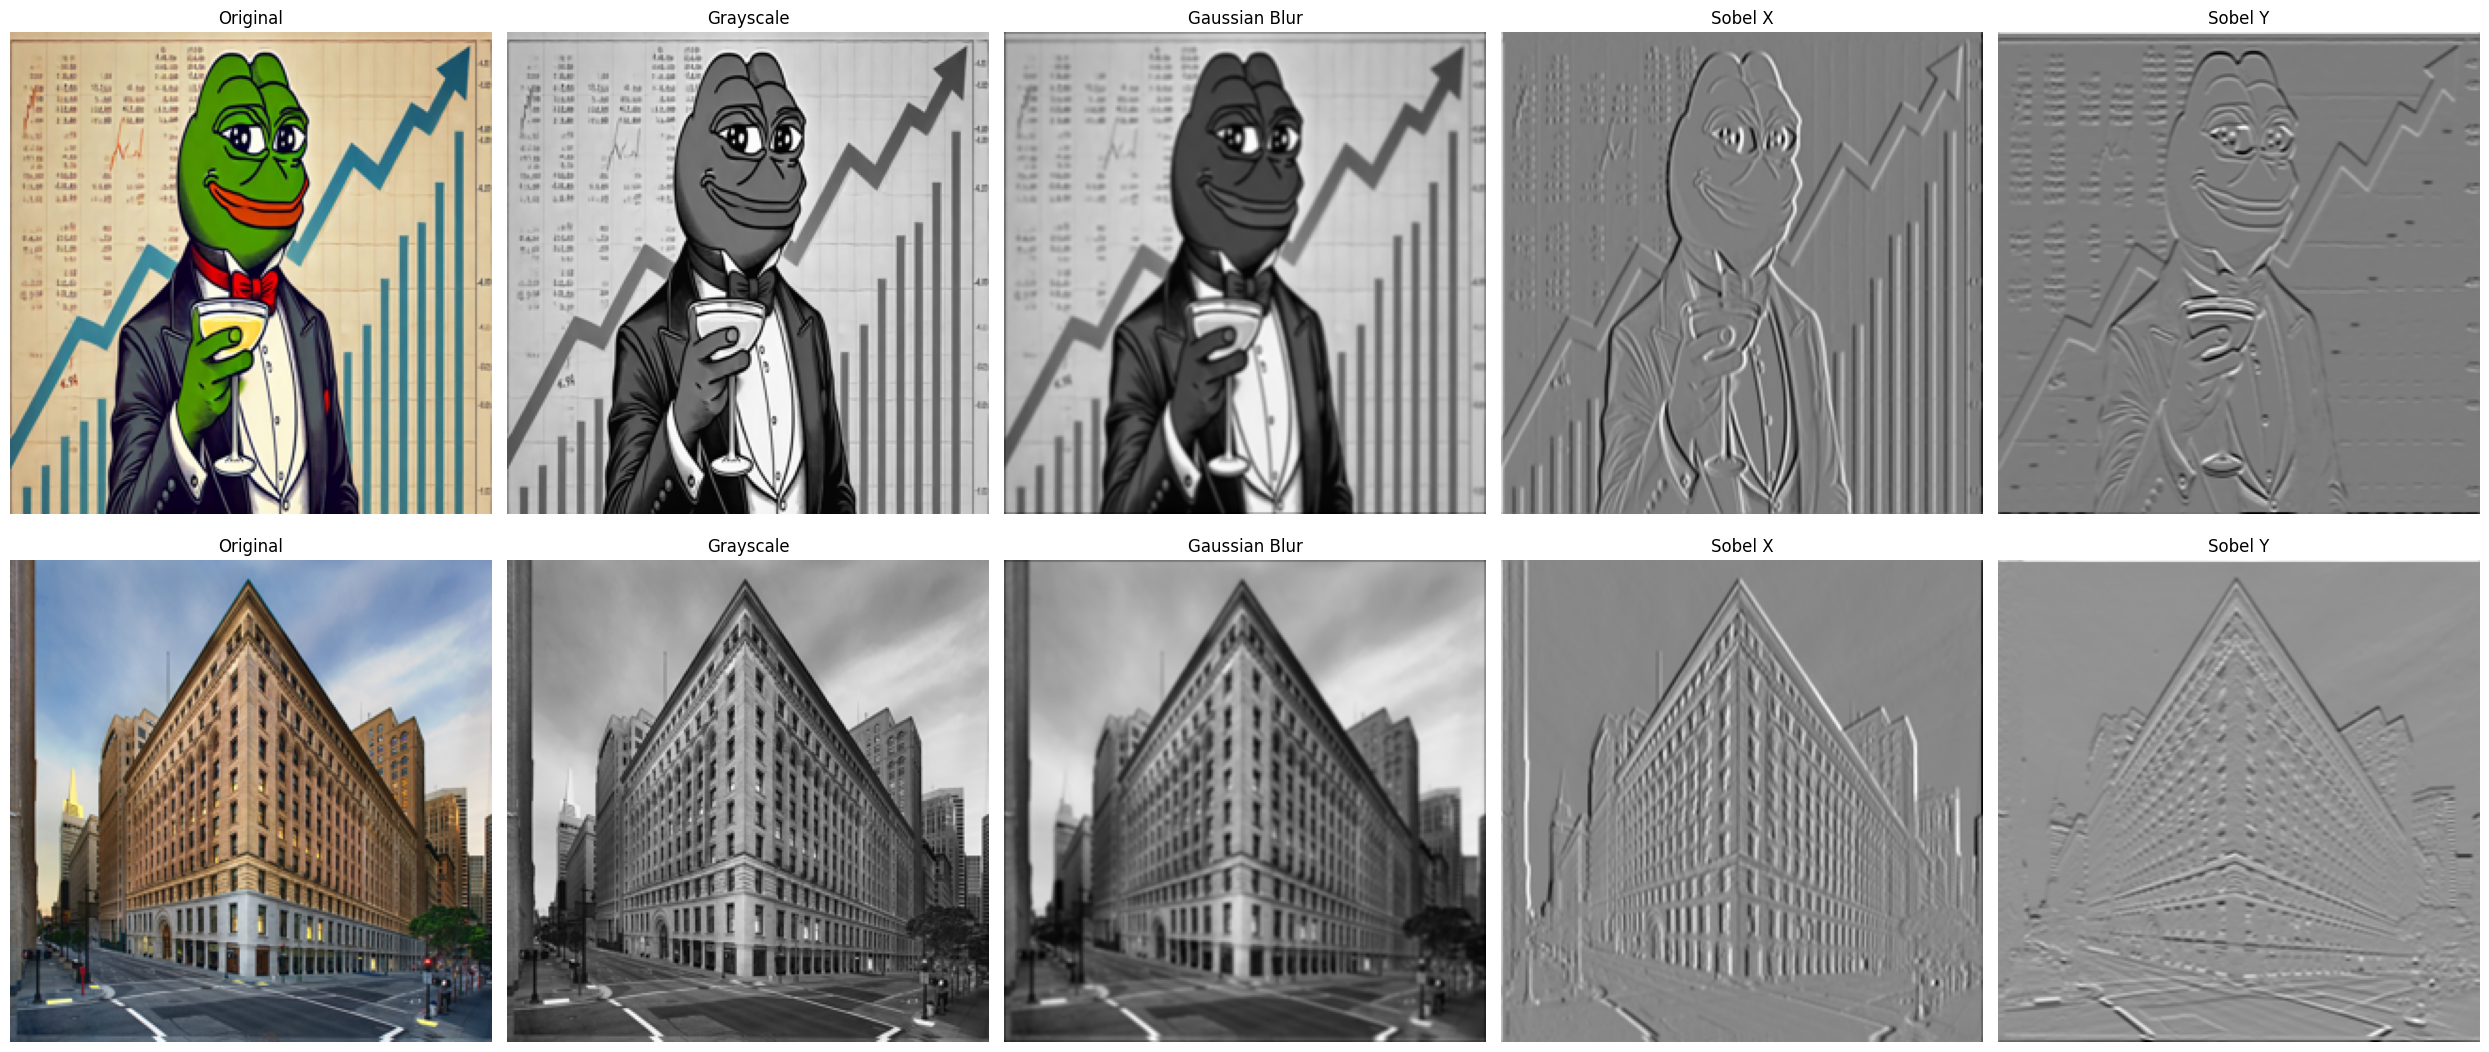

In [49]:
import matplotlib.pyplot as plt

filter_names = ['Grayscale', 'Gaussian Blur', 'Sobel X', 'Sobel Y']

fig, axs = plt.subplots(2, 5, figsize=(25, 11))

for i in range(2):
    img = x[i].transpose(1, 2, 0).astype('uint8')
    axs[i, 0].imshow(img)
    axs[i, 0].set_title('Original')
    axs[i, 0].axis('off')

    for j in range(4):
        axs[i, j + 1].imshow(out[i, j], cmap='gray')
        axs[i, j + 1].set_title(filter_names[j])
        axs[i, j + 1].axis('off')

plt.tight_layout()
plt.show()